In [1]:
from IPython.display import Markdown, display

display(Markdown("header.md"))

<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> AI Booster Week 02 - Python for Data Science </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         Paris | © Antoine SCHERRER
    </span>
</div>

Please make sure you have a working installation of Jupyter Notebook / Jupyter Lab, with Python 3.6+ up and running.

## Naming conventions

Since we will implement functions that are already available in python standard library or other libraries, you will have to *prefix* every function with `msds_` prefix.

For instance, the function implementing the `mean` function should be named `msds_mean`.

For every function you write, **you will need to write a test function** that should be named `test_[function_name]`.

For instance, the test function for `msds_mean` will be: `test_msds_mean`.

**don't forget to document all you function with Python docstring**

For instance:
```
def msds_my_awesome_function():
    """
    This function computes an awesome function
    """
    # Awesome code
    ...
```

All function should be in snake case (no Camel case!)

When creating classes, then follow these rules:
 - class names should be in camel case
 - method names should be in snake case
 - attribute names should be in snake case

## Exercise's difficulty

Every exercise will be prefixed with an indication of its difficulty:
 - [easy]: easy exercise, should be pretty straightforward for you
 - [moderate]: intermediate level exercise, you all should manage to solve them
 - [advanced]: for advanced students who want to go deeper/further

**Advanced exercises are not mandatory.**

## Required libraries

These are the libraries we will use (to check our computations for instance), you need to install them in your virtual environment:

 - `pandas`: data manipulation library
 - `scipy`: scientific library in Python
 - `numpy`: vector/matrix computations
 - `statistics`: statistics library
 - `matplotlib`: plotting lib
 - `seaborn`: alternative plotting lib (based on matplotlib)
 - `jupyter_black`: plugin for jupyter to allow `black` (code formatter) to run
 - `unittest`: testing library 




# Session 03 - Bivariate Statistics

In [2]:
# Basic imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb

# Ignore warnings from seaborn
import warnings

warnings.filterwarnings("ignore")
from pprint import pprint
import jupyter_black

jupyter_black.load()

## Qualitative data
To explore qualitative data, we will compute contingency tables.

### [moderate] contingency table (in counts)

Write a function that computes a contingency table (in counts) given two categorical data (passed as a iterables).

The output should be a dataframe with rows index being all possibles values in data1  and columns all possible values in data2.

In [3]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica")
x = zip(a, b)
# use the tuple() function to display a readable version of the result:
print(tuple(x))

(('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica'))


In [4]:
# def msds_contingency_table(data1, data2, with_totals=True):
#     """
#     Compute contingency table for 2 qualitative variables (count)
#     """
#     # {"A":{"X":1, "Z":3}, "B":{"X":1, "Z":0}, "C":{"X":1, "Z":1}}

#     assert len(data1) == len(data2)
#     N = len(data1)
#     values_data1 = sorted(list(set(data1)))
#     values_data2 = sorted(list(set(data2)))
#     print(values_data1)
#     print(values_data2)
#     d = {}
#     for v1 in values_data1:
#         d[v1] = {}
#         for v2 in values_data2:
#             d[v1][v2] = 0
#     # print(d)
#     for i in range(N):
#         # print(i, end=" ")
#         v1 = data1[i]
#         v2 = data2[i]
#         d[v1][v2] += 1

#     df = pd.DataFrame.from_dict(d, orient="index")
#     # df = pd.DataFrame(d).T

#     if with_totals:
#         df["All"] = df.sum(axis=1)
#         df.loc["All"] = df.sum(axis=0)
#     # print(df)
#     return df


# test_data1 = ["A", "A", "B", "C", "C", "A", "A"]
# test_data2 = ["Z", "Z", "X", "X", "Z", "X", "Z"]
# msds_contingency_table(test_data1, test_data2)

In [5]:
def msds_contingency_table(data1, data2, with_totals):
    """
    Compute contingency table for 2 qualitative variables (count)
    """
    # {"A":{"X":1, "Z":3}, "B":{"X":1, "Z":0}, "C":{"X":1, "Z":1}}

    assert len(data1) == len(data2)
    data1 = list(data1)
    data2 = list(data2)
    N = len(data1)
    values_data1 = sorted(list(set(data1)))
    values_data2 = sorted(list(set(data2)))
    print(values_data1)
    print(values_data2)
    d = {}
    for v1 in values_data1:
        d[v1] = {}
        for v2 in values_data2:
            d[v1][v2] = 0
    # print(d)
    for i in range(N):
        # print(i, end=" ")
        v1 = data1[i]
        v2 = data2[i]
        d[v1][v2] += 1

    df = pd.DataFrame.from_dict(d, orient="index")
    # df = pd.DataFrame(d).T

    if with_totals:
        df["Total"] = df.sum(axis=1)
        df.loc["Total"] = df.sum(axis=0)
    # print(df)
    return df


def test_msds_contingency_table():
    test_data1 = ["A", "A", "B", "C", "C", "A", "A"]
    test_data2 = ["Z", "Z", "X", "X", "Z", "X", "Z"]
    # print(
    #     pd.crosstab(
    #         test_data1, test_data2, margins=True, colnames=["data1"], rownames=["data2"]
    #     )
    # )
    # return
    cont_table = msds_contingency_table(test_data1, test_data2, True)
    print(cont_table)
    assert cont_table.shape == (4, 3)
    assert cont_table.Z["A"] == 3
    # Compare with crosstab function
    print("CROSSTAB RESULTS")
    print(
        pd.crosstab(
            test_data1, test_data2, margins=True, colnames=["data1"], rownames=["data2"]
        )
    )

    print("SALARY TEST")
    salary = pd.read_csv("../Session_01/data/salary.csv")
    salary = salary.dropna()
    gender_ed = msds_contingency_table(salary.Gender, salary["Education Level"], True)
    print(gender_ed)
    print("CROSSTAB RESULTS")
    print(pd.crosstab(salary.Gender, salary["Education Level"], margins=True))


test_msds_contingency_table()

['A', 'B', 'C']
['X', 'Z']
       X  Z  Total
A      1  3      4
B      1  0      1
C      1  1      2
Total  3  4      7
CROSSTAB RESULTS
data1  X  Z  All
data2           
A      1  3    4
B      1  0    1
C      1  1    2
All    3  4    7
SALARY TEST
['Female', 'Male']
["Bachelor's", "Master's", 'PhD']
        Bachelor's  Master's  PhD  Total
Female         103        50   26    179
Male           121        48   25    194
Total          224        98   51    373
CROSSTAB RESULTS
Education Level  Bachelor's  Master's  PhD  All
Gender                                         
Female                  103        50   26  179
Male                    121        48   25  194
All                     224        98   51  373


### [easy] contingency table (in percentage of overall total)

Write a function that computes a contingency table (in percentage of overall total) given two categorical data (passed as a iterables).

The output should be a dataframe with rows index being all possibles values in data1  and columns all possible values in data2.

**You need to perform the computation yourself, and therefore you cannot use `crosstab` pandas function!**

But, you can check your implementation by comparing with this function 😃

In [6]:
def msds_contingency_table_overall(data1, data2, with_totals):
    df = msds_contingency_table(data1, data2, True)
    df = df / df.loc["Total"]["Total"] * 100
    return df


def test_msds_contingency_table_overall():
    test_data1 = ["A", "A", "B", "C", "C", "A", "A"]
    test_data2 = ["Z", "Z", "X", "X", "Z", "X", "Z"]
    cont_table = msds_contingency_table_overall(test_data1, test_data2, True)
    print(cont_table)
    assert cont_table.shape == (4, 3)
    assert abs(cont_table.Total["Total"] - 100) < 1e-5
    print("CROSSTAB RESULTS")
    print(
        pd.crosstab(
            test_data1,
            test_data2,
            margins=True,
            normalize=True,
            colnames=["data1"],
            rownames=["data2"],
        )
        * 100
    )

    print("SALARY TEST")
    salary = pd.read_csv("../Session_01/data/salary.csv")
    salary = salary.dropna()
    gender_ed = msds_contingency_table_overall(
        salary.Gender, salary["Education Level"], True
    )
    print(gender_ed)
    print("CROSSTAB RESULTS")
    print(
        pd.crosstab(
            salary.Gender, salary["Education Level"], normalize=True, margins=True
        )
        * 100
    )


test_msds_contingency_table_overall()

['A', 'B', 'C']
['X', 'Z']
               X          Z       Total
A      14.285714  42.857143   57.142857
B      14.285714   0.000000   14.285714
C      14.285714  14.285714   28.571429
Total  42.857143  57.142857  100.000000
CROSSTAB RESULTS
data1          X          Z         All
data2                                  
A      14.285714  42.857143   57.142857
B      14.285714   0.000000   14.285714
C      14.285714  14.285714   28.571429
All    42.857143  57.142857  100.000000
SALARY TEST
['Female', 'Male']
["Bachelor's", "Master's", 'PhD']
        Bachelor's   Master's        PhD       Total
Female   27.613941  13.404826   6.970509   47.989276
Male     32.439678  12.868633   6.702413   52.010724
Total    60.053619  26.273458  13.672922  100.000000
CROSSTAB RESULTS
Education Level  Bachelor's   Master's        PhD         All
Gender                                                       
Female            27.613941  13.404826   6.970509   47.989276
Male              32.439678  12.8686

### [easy] contingency table (in percentage of row total)
Write a function that computes a contingency table (in percentage of row total) given two categorical data (passed as a iterables).

The output should be a dataframe with rows index being all possibles values in data1 and columns all possible values in data2. 


In [13]:
def msds_contingency_table_row(data1, data2, with_totals=True):
    df = msds_contingency_table(data1, data2, True)

    df = df.div(df.Total, axis=0) * 100
    df.drop(columns="Total", inplace=True)
    return df


def test_msds_contingency_table_row():
    test_data1 = ["A", "A", "B", "C", "C", "A", "A"]
    test_data2 = ["Z", "Z", "X", "X", "Z", "X", "Z"]
    cont_table = msds_contingency_table_row(test_data1, test_data2)
    print(cont_table)
    assert cont_table.shape == (4, 2)
    assert abs(cont_table.X["A"] - 25) < 1e-5
    print("CROSSTAB RESULTS")
    print(
        pd.crosstab(
            test_data1,
            test_data2,
            margins=True,
            normalize="index",
            colnames=["data1"],
            rownames=["data2"],
        )
        * 100
    )

    print("SALARY TEST")
    salary = pd.read_csv("../Session_01/data/salary.csv")
    salary = salary.dropna()
    gender_ed = msds_contingency_table_row(salary.Gender, salary["Education Level"])
    print(gender_ed)
    print("CROSSTAB RESULTS")
    print(
        pd.crosstab(
            salary.Gender, salary["Education Level"], normalize="index", margins=True
        )
        * 100
    )


test_msds_contingency_table_row()

['A', 'B', 'C']
['X', 'Z']
                X          Z
A       25.000000  75.000000
B      100.000000   0.000000
C       50.000000  50.000000
Total   42.857143  57.142857
CROSSTAB RESULTS
data1           X          Z
data2                       
A       25.000000  75.000000
B      100.000000   0.000000
C       50.000000  50.000000
All     42.857143  57.142857
SALARY TEST
['Female', 'Male']
["Bachelor's", "Master's", 'PhD']
        Bachelor's   Master's        PhD
Female   57.541899  27.932961  14.525140
Male     62.371134  24.742268  12.886598
Total    60.053619  26.273458  13.672922
CROSSTAB RESULTS
Education Level  Bachelor's   Master's        PhD
Gender                                           
Female            57.541899  27.932961  14.525140
Male              62.371134  24.742268  12.886598
All               60.053619  26.273458  13.672922


### [easy] contingency table (in percentage of column total)
Write a function that computes a contingency table (in percentage of row total) given two categorical data (passed as a iterables).

The output should be a dataframe with rows index being all possibles values in data1 and columns all possible values in data2. The value in each cell should

In [16]:
def msds_contingency_table_col(data1, data2, with_totals=True):
    
    df = msds_contingency_table(data1, data2, True)
    df = df.div(df.loc["Total"], axis=1) * 100

    return df.drop(["Total"])


def test_msds_contingency_table_col():
    test_data1 = ["A", "A", "B", "C", "C", "A", "A"]
    test_data2 = ["Z", "Z", "X", "X", "Z", "X", "Z"]
    cont_table = msds_contingency_table_col(test_data1, test_data2)
    print(cont_table)
    print(cont_table.shape)
    assert cont_table.shape == (3, 3)
    assert abs(cont_table.X["A"] - 33.33333333) < 1e-5
    print("CROSSTAB RESULTS")
    print(
        pd.crosstab(
            test_data1,
            test_data2,
            margins=True,
            normalize="columns",
            colnames=["data1"],
            rownames=["data2"],
        )
        * 100
    )

    print("SALARY TEST")
    salary = pd.read_csv("../Session_01/data/salary.csv")
    salary = salary.dropna()
    gender_ed = msds_contingency_table_col(salary.Gender, salary["Education Level"])
    print(gender_ed)
    print("CROSSTAB RESULTS")
    print(
        pd.crosstab(
            salary.Gender, salary["Education Level"], normalize="columns", margins=True
        )
        * 100
    )


test_msds_contingency_table_col()

['A', 'B', 'C']
['X', 'Z']
           X     Z      Total
A  33.333333  75.0  57.142857
B  33.333333   0.0  14.285714
C  33.333333  25.0  28.571429
(3, 3)
CROSSTAB RESULTS
data1          X     Z        All
data2                            
A      33.333333  75.0  57.142857
B      33.333333   0.0  14.285714
C      33.333333  25.0  28.571429
SALARY TEST
['Female', 'Male']
["Bachelor's", "Master's", 'PhD']
        Bachelor's   Master's        PhD      Total
Female   45.982143  51.020408  50.980392  47.989276
Male     54.017857  48.979592  49.019608  52.010724
CROSSTAB RESULTS
Education Level  Bachelor's   Master's        PhD        All
Gender                                                      
Female            45.982143  51.020408  50.980392  47.989276
Male              54.017857  48.979592  49.019608  52.010724


### [easy] Visualization of contingency table 

Write a function that draws a contingency table (a dataframe) as a heatmap (2D image).

Explore improving the chart using `matplotlib` and `seaborn`.

Use `salary.csv` dataset to test out!


['Female', 'Male']
["Bachelor's", "Master's", 'PhD']
['Female', 'Male']
["Bachelor's", "Master's", 'PhD']
['Female', 'Male']
["Bachelor's", "Master's", 'PhD']


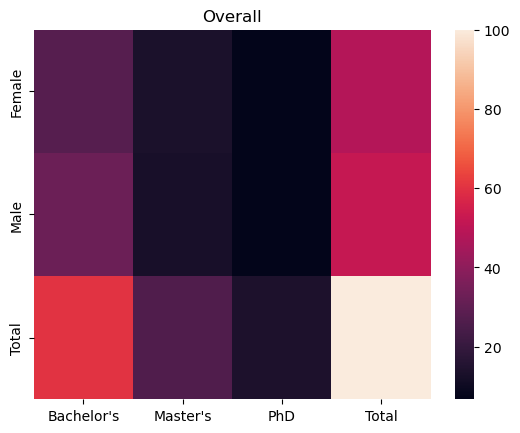

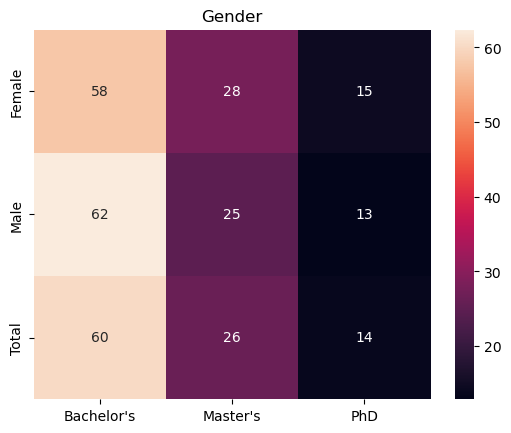

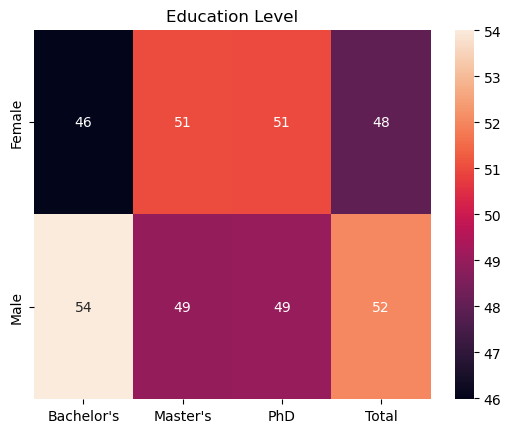

In [21]:
def msds_contingency_table_plot(df, annot=True, title=""):
    plt.figure()
    sb.heatmap(df, annot=annot, fmt=".0f")
    plt.title(title)


def test_msds_contingency_table_plot():
    salary_data = pd.read_csv("../Session_01/data/salary.csv")
    salary_data = salary_data.dropna()
    cont_table1 = msds_contingency_table_overall(
        salary_data.Gender, salary_data["Education Level"], with_totals=False
    )
    msds_contingency_table_plot(cont_table1, title="Overall", annot=False)

    cont_table2 = msds_contingency_table_row(
        salary_data.Gender, salary_data["Education Level"], with_totals=False
    )
    msds_contingency_table_plot(cont_table2, title="Gender")

    cont_table3 = msds_contingency_table_col(
        salary_data.Gender, salary_data["Education Level"], with_totals=False
    )
    msds_contingency_table_plot(cont_table3, title="Education Level")


test_msds_contingency_table_plot()

## Quantitative data
To explore quantitative data, we will compute correlation coeficents and covariances.

### [easy] Visualization of two variables

Write a function that draws a scatter plot given two quantitative data sets.
Play with `matplotlib` / `seaborn` to improve the graphical quality of your chart.

*When finished, you can upgrade your function to use a third variable for points color*

Explore using again the `salary.csv` dataset.
 

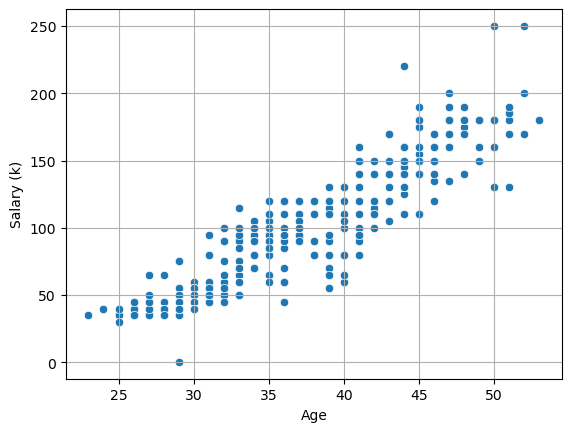

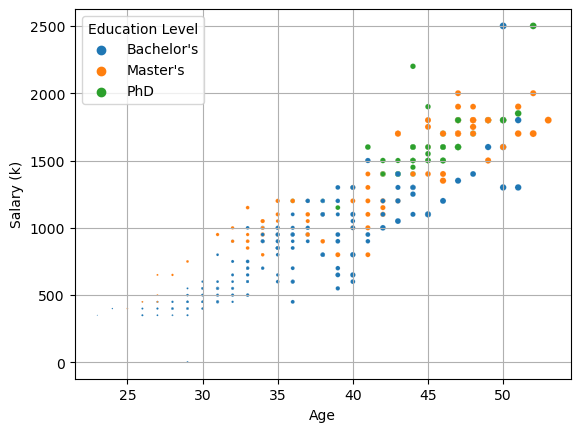

In [30]:
def msds_scatter_plot(data1, data2, title1, title2, color=None, size=None):
    plt.figure()
    sb.scatterplot(x=data1, y=data2, hue=color, s=size).set(
        ylabel=title2, xlabel=title1
    )
    plt.grid(zorder=0)


def test_msds_scatter_plot():
    salary_data = pd.read_csv("../Session_01/data/salary.csv")
    salary_data = salary_data.dropna()
    msds_scatter_plot(salary_data.Age, salary_data.Salary / 1000, "Age", "Salary (k)")
    msds_scatter_plot(
        salary_data.Age,
        salary_data.Salary / 100,
        "Age",
        "Salary (k)",
        color=salary_data["Education Level"],
        size=salary_data["Years of Experience"],
    )


test_msds_scatter_plot()

### [easy] Covariance 

Write a function that computes the covariance of two quantitative data sets (of same size!).

The formula is as follows:

$\Large \text{cov}(X,Y) = \frac{\sum_{i=1}^{N}(X_i - \bar{X})(Y_i - \bar{Y})}{n-1}$

with:
 - $\bar{X}$ is the sample mean of X
 - $\bar{Y}$ is the sample mean of Y

Apply your function to the `salary.csv` dataset to see the correlation between age and experience.$
Validate your implementation by comparing your results with results from `numpy` package.

In [33]:
def msds_covariance(data1, data2):
    X = list(data1)
    Y = list(data2)

    X_bar = np.mean(X)
    Y_bar = np.mean(Y)

    P = []

    # for i in range(len(X)):
    #     P.append((X[i] - X_bar) * (Y[i] - Y_bar))

    P = [(X[i] - X_bar) * (Y[i] - Y_bar) for i in range(len(X))]
    S = sum(P)
    return S / (len(X) - 1)


def test_msds_covariance():
    cov = msds_covariance([1, 2, 3, 4], [1, 2, 3, 4])
    salary_data = pd.read_csv("../Session_01/data/salary.csv")
    salary_data = salary_data.dropna()
    assert abs(np.cov([[1, 2, 3, 4], [1, 2, 3, 4]])[0][1] - cov) < 1e-5
    cov = msds_covariance(salary_data.Age, salary_data.Salary)
    assert abs(np.cov([salary_data.Age, salary_data.Salary])[0][1] - cov) < 1e-5


test_msds_covariance()

### [easy] Correlation coeficient 

Write a function that computes the correlation coeficient of two quantitative data sets (of same size!).

The formula is 

$\Large r = \frac{\text{cov}(X,Y)}{S_X S_Y}$

with:
 - $S_{X}$ is the sample variance of X
 - $S_{Y}$ is the sample variance of Y

Apply your function to the `salary.csv` dataset to see the correlation between age and experience.

Validate your implementation by comparing your results with results from `statistics` or `statmodels` packages.

In [35]:
def msds_corr(data1, data2):
    X = data1
    Y = data2
    cov = msds_covariance(X, Y)
    std_X = np.std(X, ddof=1)
    std_Y = np.std(Y, ddof=1)
    return cov / (std_X * std_Y)


def test_msds_corr():
    corr = msds_corr([1, 2, 3, 4], [1, 2, 3, 4])
    salary_data = pd.read_csv("../Session_01/data/salary.csv")
    salary_data = salary_data.dropna()
    assert abs(np.corrcoef([[1, 2, 3, 4], [1, 2, 3, 4]])[0][1] - corr) < 1e-5
    corr = msds_corr(salary_data.Age, salary_data.Salary)
    assert abs(np.corrcoef([salary_data.Age, salary_data.Salary])[0][1] - corr) < 1e-5


test_msds_corr()